In [50]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt
from instance_normalization import InstanceNormalization
from my_upsampling_2d import MyUpSampling2D
from FgSegNet_v2_module import loss, acc, loss2, acc2
import tensorflow.python as tf

def load_image(path):
    x = image.load_img(path)
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    # x = image.smart_resize(x, (240, 320))
    return x

1/1 [==============================] - 0s 306ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 240, 320, 1)
(240, 320)


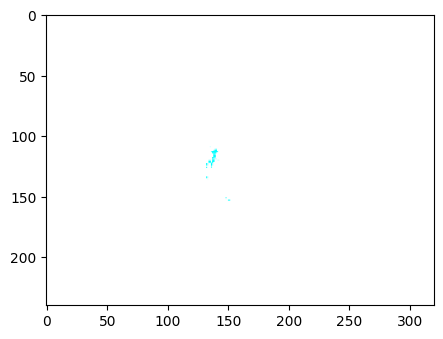

In [55]:
# Segment on a single CPU for this test
# Want to speed up training or testing?
# Read my blog post at https://towardsdatascience.com/a-comprehensive-guide-on-how-to-fine-tune-deep-neural-networks-using-keras-on-google-colab-free-daaaa0aced8f

# a sample FgSegNet_v2 model can be downloaded at https://drive.google.com/open?id=1Rr-NCcYdNKtDfQWGYWhRVDDvCLnXASLz
# a sample test frame can be downloaded at https://drive.google.com/open?id=1pONZTp604CFg5MSqTknj875hYAYTtifE
image_path = 'd1.png'
model_path = 'mdl_highway_fgsegnet_v2.h5'
ok = image.load_img(image_path)
ok = image.smart_resize(ok, (240, 320))
x = load_image(image_path) # load a test frame
model = load_model(
    model_path,
    custom_objects={
        'MyUpSampling2D': MyUpSampling2D,
        'InstanceNormalization': InstanceNormalization, 
        'loss':loss, 
        'acc':acc, 
        'loss2':loss2, 
        'acc2':acc2
    }
) #load the trained model

probs = model.predict(x, batch_size=1, verbose=1)

print(probs.shape) # (1, 240,320,1)
probs = probs.reshape([probs.shape[1], probs.shape[2]])
print(probs.shape) # (240,320)

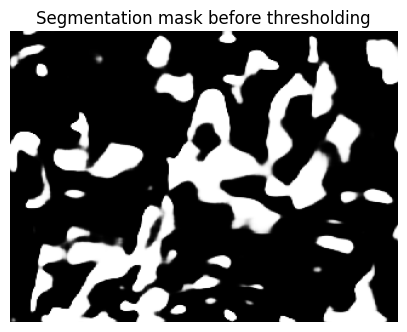

In [45]:
# plot the first segmentation mask

plt.subplot(1, 1, 1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.cmap'] = 'gray'

plt.imshow(probs)

plt.title('Segmentation mask before thresholding')
plt.axis('off')
plt.show()

In [ ]:
# Thresholding (one can specify any threshold values)
threshold = 0.8
probs[probs<threshold] = 0.
probs[probs>=threshold] = 1.

plt.subplot(1, 1, 1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.cmap'] = 'gray'

plt.imshow(probs)

plt.title('Segmentation mask after thresholding')
plt.axis('off')
plt.show()


In [ ]:
print(probs)